# Diabetes Prediction using Single Layer Perceptron

In this assignment, we implement a single layer perceptron with step activation function (linear) on the Pima Indians Diabetes Dataset manually and try out different models and compare the performance of these different models.

# Data loading and Basic summary statistics of the data

In [27]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, auc, confusion_matrix,
                             roc_auc_score, mean_squared_error, classification_report)
from sklearn.linear_model import Perceptron, LogisticRegression


In [1]:
# Load the dataset
data = pd.read_csv('diabetes.csv')

# Check the data structure
print(data.head())  # To see the first few rows

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
print(data.columns)
print("\n",data.describe())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.9

# Data Visualizations

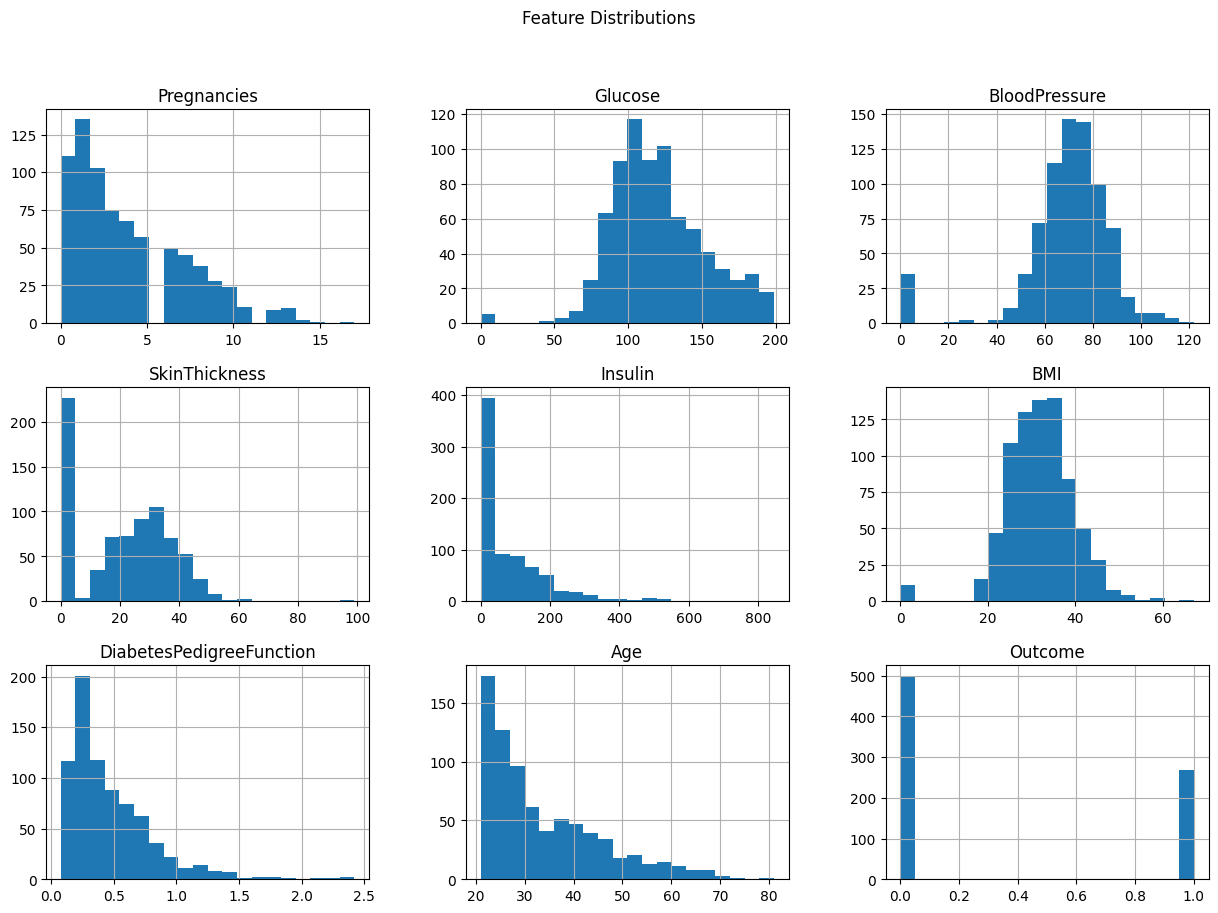

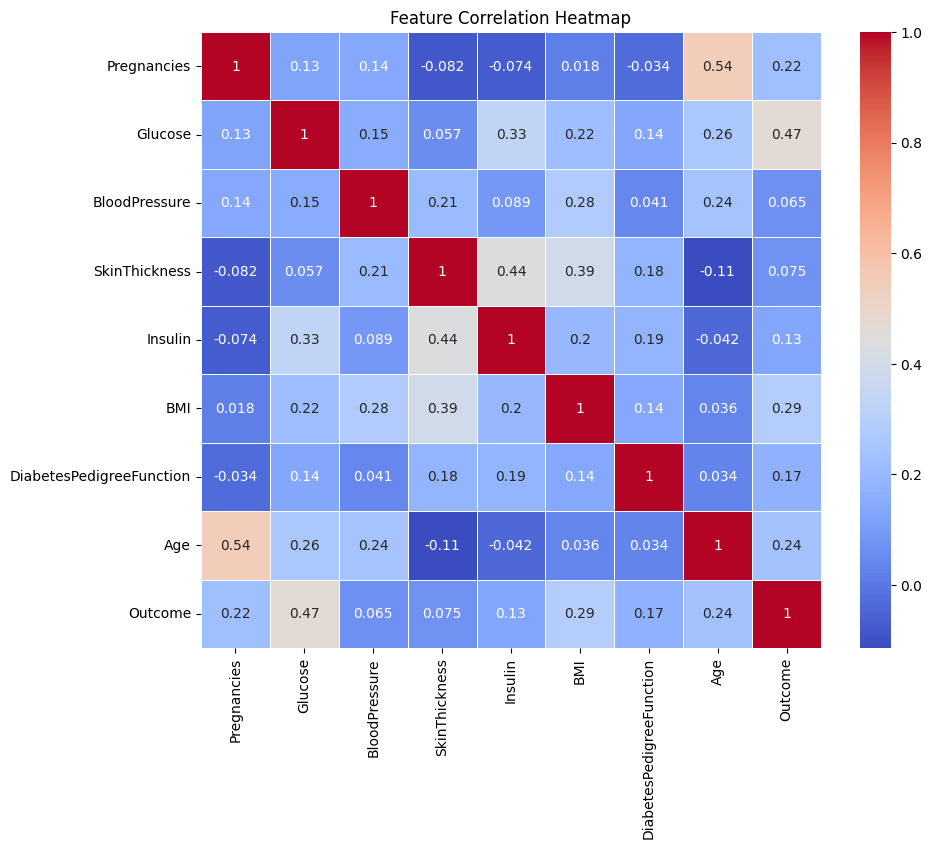

In [3]:
# Histograms for all features
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

# Heatmap for feature correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


# Data splitting into training and test sets

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dividing the data into features and target variables
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing the data (Normalization)

In [5]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implementation of base line perceptron (single layer perceptron) from scratch

In [6]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, auc, confusion_matrix, mean_squared_error)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define hyperparameters
EPOCHS = 100
LEARNING_RATE = 0.01

In [7]:
#Defining all the functions required
# Initialize Weights and Bias
def initialize_weights(n_features):
    """ Initialize weights and bias to zero. """
    w = np.zeros(n_features)  # Initialize weights to 0
    b = 0  # Initialize bias to 0
    return w, b

# Define the Step Function (Activation)
def step_function(z):
    """ Step activation function. """
    return 1 if z >= 0 else 0

# Sigmoid Function
def sigmoid(z):
    """ Sigmoid activation function. """
    return 1 / (1 + np.exp(-z))

# Calculate Mean Squared Error
def mean_squared_error_calculation(y_true, y_pred):
    """ Calculate Mean Squared Error. """
    return np.mean((y_true - y_pred) ** 2)

In [8]:
# Perceptron Training
def perceptron_train(X_train, y_train, epochs, learning_rate, use_sigmoid=False):
    """ Train the perceptron and track accuracy and loss. """
    n_samples, n_features = X_train.shape
    w, b = initialize_weights(n_features)
    accuracy_list = []
    loss_list = []

    for epoch in range(epochs):
        total_loss = 0
        correct_predictions = 0

        for idx, x_i in enumerate(X_train):
            linear_output = np.dot(x_i, w) + b

            if use_sigmoid:
                y_pred = sigmoid(linear_output)
                error = y_train[idx] - y_pred
                w += learning_rate * error * x_i
                b += learning_rate * error
                total_loss += - (y_train[idx] * np.log(y_pred + 1e-10) + (1 - y_train[idx]) * np.log(1 - y_pred + 1e-10))
                if (y_pred >= 0.5) == y_train[idx]:
                    correct_predictions += 1
            else:
                y_pred = step_function(linear_output)
                error = y_train[idx] - y_pred
                w += learning_rate * error * x_i
                b += learning_rate * error
                total_loss += error**2  # Track total loss
                if y_pred == y_train[idx]:
                    correct_predictions += 1

        accuracy = correct_predictions / len(y_train)
        accuracy_list.append(accuracy)
        loss_list.append(total_loss)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Weights: {w}, Bias: {b}, Accuracy: {accuracy * 100:.2f}%')

    return w, b, accuracy_list, loss_list

In [9]:
# Perceptron Prediction
def perceptron_predict(X, w, b, use_sigmoid=False):
    """ Make predictions using the trained perceptron. """
    y_pred = []
    for x_i in X:
        linear_output = np.dot(x_i, w) + b
        if use_sigmoid:
            y_pred.append(sigmoid(linear_output))
        else:
            y_pred.append(step_function(linear_output))
    return np.array(y_pred)

In [10]:
# Plotting Accuracy and Loss
def plot_training_results(accuracies, losses, title):
    """ Plot Training Accuracy and Loss. """
    plt.figure(figsize=(12, 5))

    # Plot Training Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(accuracies)
    plt.title(f'Training Accuracy Over Epochs ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    # Plot Training Loss
    plt.subplot(1, 2, 2)
    plt.plot(losses)
    plt.title(f'Training Loss Over Epochs ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

In [15]:
# Evaluate the Model and Calculate Metrics
# Predict probabilities using the perceptron model
def perceptron_predict_proba(X, w, b):
    """ Predict probabilities using the perceptron model. """
    linear_output = np.dot(X, w) + b
    probabilities = sigmoid(linear_output)  # Sigmoid function for probabilities
    return probabilities

def evaluate_model(y_true, y_pred):
    """ Evaluate model performance using multiple metrics. """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    return accuracy, precision, recall, f1

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, label):
    """ Plot ROC curve for the model. """
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {label}')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, label):
    """ Plot confusion matrix for the model. """
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {label}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [12]:
# Traditional Perceptron
w, b, training_accuracies, training_losses = perceptron_train(X_train, y_train, EPOCHS, LEARNING_RATE)

# Testing and Evaluation for Traditional Perceptron
y_pred_train = perceptron_predict(X_train, w, b)
y_pred_test = perceptron_predict(X_test, w, b)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 10/100, Weights: [ 0.04142301  0.03570102 -0.02104253 -0.01102681  0.01749529  0.04268888
  0.01547479 -0.02128418], Bias: -0.05, Accuracy: 70.03%
Epoch 20/100, Weights: [ 0.03011777  0.01450225 -0.01261724 -0.00415261  0.01194698  0.02629003
  0.01980766 -0.00554315], Bias: -0.04, Accuracy: 70.20%
Epoch 30/100, Weights: [ 0.01881254  0.02673162 -0.04419732  0.00012779  0.00372949  0.04273183
  0.01983239 -0.01677257], Bias: -0.03, Accuracy: 70.03%
Epoch 40/100, Weights: [ 0.05652617  0.02445417 -0.03077356 -0.01167526  0.0237808   0.04708487
  0.01633642 -0.01171402], Bias: -0.05, Accuracy: 68.89%
Epoch 50/100, Weights: [ 0.0422003   0.0132526  -0.02288889  0.00362878  0.02090168  0.02848803
  0.01897574 -0.02120341], Bias: -0.04, Accuracy: 68.73%
Epoch 60/100, Weights: [ 0.03693633  0.02267026 -0.04149426 -0.0193257   0.03369329  0.0286388
  0.02182304 -0.0185126 ], Bias: -0.03, Accuracy: 68.73%
Epoch 70/100, Weights: [ 0.0339157   0.01017376 -0.06149694 -0.01738035  0.02146668

In [13]:
# Calculate and print Mean Squared Error for Traditional Perceptron
mse_train = mean_squared_error_calculation(y_train, y_pred_train)
mse_test = mean_squared_error_calculation(y_test, y_pred_test)
print(f'Mean Squared Error (Train): {mse_train:.4f}')
print(f'Mean Squared Error (Test): {mse_test:.4f}')

Mean Squared Error (Train): 0.2834
Mean Squared Error (Test): 0.2597


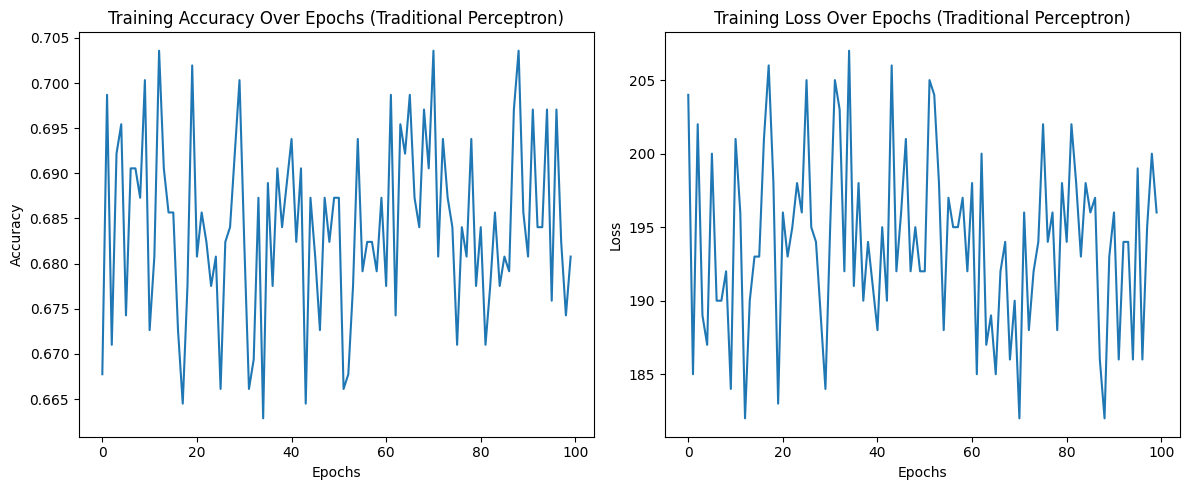

Metrics for Single Layer Perceptron:
Accuracy: 0.7403
Precision: 0.7143
Recall: 0.4545
F1 Score: 0.5556


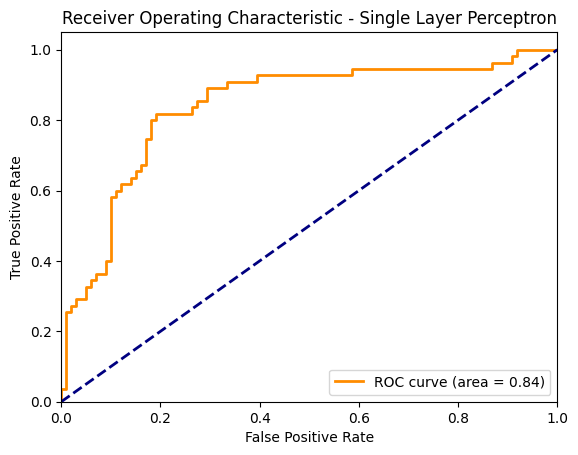

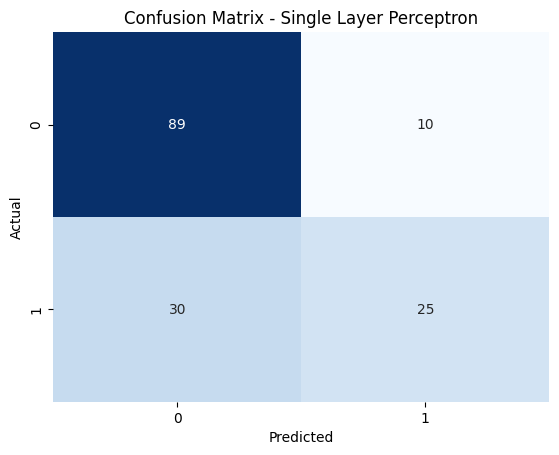

In [16]:
# Plot Training Accuracy and Loss for Traditional Perceptron
plot_training_results(training_accuracies, training_losses, "Traditional Perceptron")

# Evaluate the Traditional Perceptron
print("Metrics for Single Layer Perceptron:")
evaluate_model(y_test, y_pred_test)

# Predict probabilities for ROC curve
y_pred_proba_exp1 = perceptron_predict_proba(X_test, w, b)

# Plot ROC curve for Traditional Perceptron
plot_roc_curve(y_test, y_pred_proba_exp1, "Single Layer Perceptron")

# Plot Confusion Matrix for Traditional Perceptron
plot_confusion_matrix(y_test, y_pred_test, "Single Layer Perceptron")


# Training Perceptron using a non-linear activation function (sigmoid)

In [18]:
# Sigmoid Perceptron

# Perceptron Prediction
def perceptron_predict_sigmoid(X, w, b):
    """ Make predictions using the trained perceptron with sigmoid activation. """
    y_pred = []
    for x_i in X:
        linear_output = np.dot(x_i, w) + b
        y_pred.append(sigmoid(linear_output))
    return np.array([1 if pred >= 0.5 else 0 for pred in y_pred])


w_sigmoid, b_sigmoid, training_accuracies_sigmoid, training_losses_sigmoid = perceptron_train(X_train, y_train, EPOCHS, LEARNING_RATE, use_sigmoid=True)

# Testing and Evaluation for Sigmoid Perceptron
y_pred_train_sigmoid = perceptron_predict_sigmoid(X_train, w_sigmoid, b_sigmoid)
y_pred_test_sigmoid = perceptron_predict_sigmoid(X_test, w_sigmoid, b_sigmoid)

train_accuracy_sigmoid = accuracy_score(y_train, y_pred_train_sigmoid)
test_accuracy_sigmoid = accuracy_score(y_test, y_pred_test_sigmoid)

print(f'Training Accuracy (Sigmoid): {train_accuracy_sigmoid * 100:.2f}%')
print(f'Test Accuracy (Sigmoid): {test_accuracy_sigmoid * 100:.2f}%')

# Calculate Mean Squared Error for Sigmoid Perceptron
mse_sigmoid_train = mean_squared_error_calculation(y_train, y_pred_train_sigmoid)
mse_sigmoid_test = mean_squared_error_calculation(y_test, y_pred_test_sigmoid)

print(f'Mean Squared Error (Train, Sigmoid): {mse_sigmoid_train:.4f}')
print(f'Mean Squared Error (Test, Sigmoid): {mse_sigmoid_test:.4f}')

Epoch 10/100, Weights: [ 0.22181719  1.09780412 -0.25684111  0.04185257 -0.14513927  0.81319293
  0.21096251  0.38879413], Bias: -0.880381559542982, Accuracy: 77.36%
Epoch 20/100, Weights: [ 0.22122864  1.1070537  -0.26164146  0.04649174 -0.15243928  0.81770857
  0.21125677  0.39111697], Bias: -0.8842742300107242, Accuracy: 77.36%
Epoch 30/100, Weights: [ 0.22120948  1.10726343 -0.26172458  0.04663335 -0.15261981  0.81773408
  0.21125984  0.39115278], Bias: -0.8843341186900442, Accuracy: 77.36%
Epoch 40/100, Weights: [ 0.22120915  1.10726858 -0.26172618  0.04663716 -0.15262435  0.81773369
  0.21125988  0.39115317], Bias: -0.8843352018682601, Accuracy: 77.36%
Epoch 50/100, Weights: [ 0.22120915  1.10726871 -0.26172621  0.04663726 -0.15262447  0.81773367
  0.21125988  0.39115317], Bias: -0.8843352240637011, Accuracy: 77.36%
Epoch 60/100, Weights: [ 0.22120915  1.10726871 -0.26172621  0.04663726 -0.15262447  0.81773367
  0.21125988  0.39115317], Bias: -0.8843352245605537, Accuracy: 77.36%

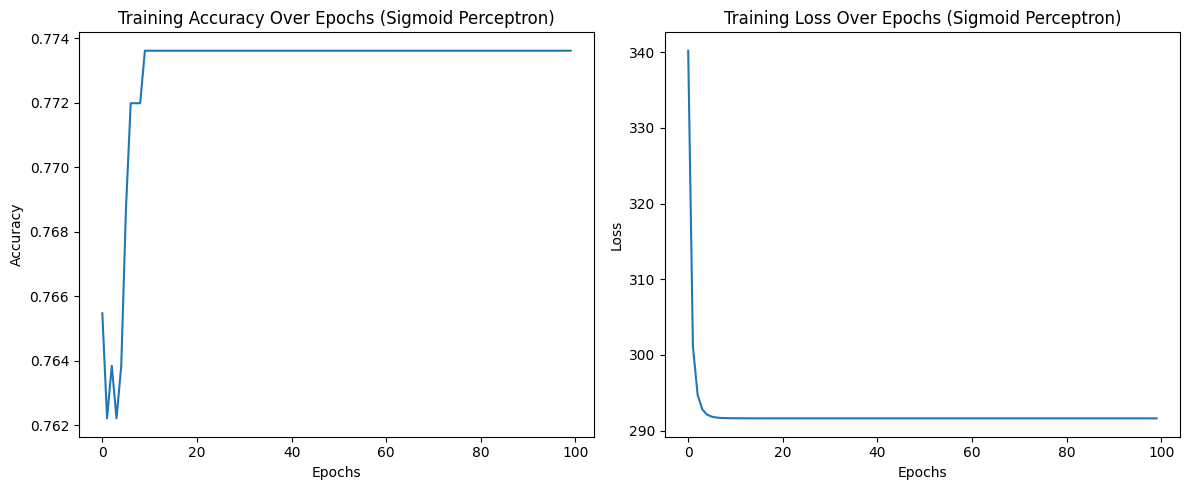

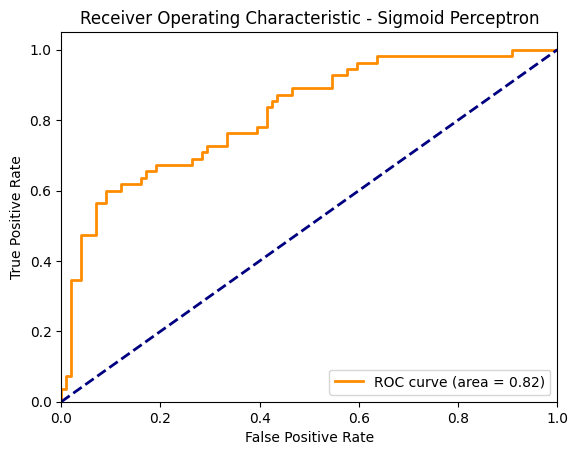

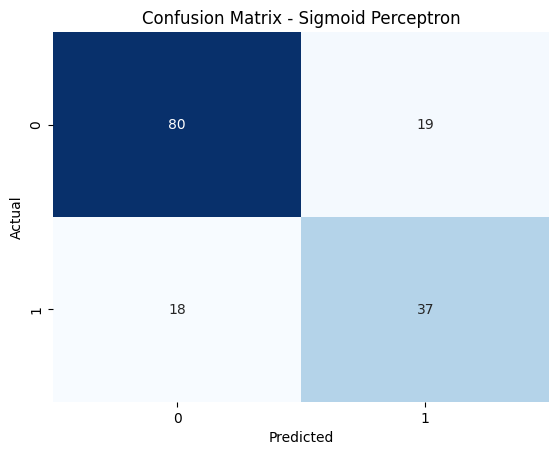

In [21]:
# Plot Training Accuracy and Loss for Sigmoid Perceptron
plot_training_results(training_accuracies_sigmoid, training_losses_sigmoid, "Sigmoid Perceptron")

# ROC Curve and AUC Score for Sigmoid Perceptron
y_pred_proba_sigmoid = perceptron_predict_proba(X_test, w_sigmoid, b_sigmoid)
roc_auc_sigmoid = roc_auc_score(y_test, y_pred_proba_sigmoid)

# Plot ROC curve for Sigmoid Perceptron
plot_roc_curve(y_test, y_pred_proba_sigmoid, "Sigmoid Perceptron")

# Confusion Matrix for Sigmoid Perceptron
plot_confusion_matrix(y_test, y_pred_test_sigmoid, "Sigmoid Perceptron")


# Implementing Logistic Regression model on the dataset

In [24]:
# Implementing Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Test Accuracy: {accuracy_log_reg * 100:.2f}%")

# Calculate Mean Squared Error for Logistic Regression
mse_log_reg = mean_squared_error_calculation(y_test, y_pred_log_reg)
print(f'Mean Squared Error (Test, Logistic Regression): {mse_log_reg:.4f}')

# Get evaluation metrics for Logistic Regression
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Test Accuracy: 75.32%
Mean Squared Error (Test, Logistic Regression): 0.2468
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Confusion Matrix for Logistic Regression:
[[79 20]
 [18 37]]


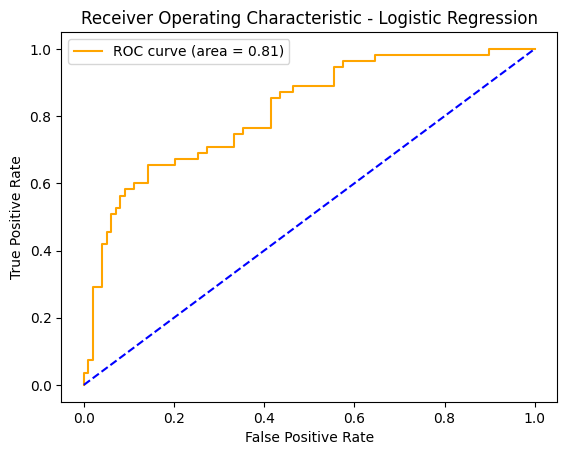

In [25]:
# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_log_reg)

# ROC curve for Logistic Regression
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log_reg)
roc_auc = roc_auc_score(y_test, y_proba_log_reg)

plt.figure()
plt.plot(fpr, tpr, color='orange', label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic - Logistic Regression")
plt.legend()
plt.show()

# Analyzing Perceptron performance using Hyperparameter Tuning

In [28]:
# Hyperparameter tuning with GridSearchCV for Perceptron
param_grid = {
    'max_iter': [50, 100, 200],
    'eta0': [0.001, 0.01, 0.1, 1.0]  # Learning rates
}

grid_search = GridSearchCV(Perceptron(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters from GridSearchCV: {best_params}")

# Evaluate the best perceptron model
best_perceptron = grid_search.best_estimator_
y_pred_best = best_perceptron.predict(X_test)

Best parameters from GridSearchCV: {'eta0': 0.1, 'max_iter': 50}


In [29]:
# Calculate accuracy and other metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
mse_best = mean_squared_error_calculation(y_test, y_pred_best)

print(f"Best Perceptron Test Accuracy: {accuracy_best * 100:.2f}%")
print(f"Mean Squared Error (Test, Best Perceptron): {mse_best:.4f}")

Best Perceptron Test Accuracy: 72.73%
Mean Squared Error (Test, Best Perceptron): 0.2727


# Summary of different models experimented

In [30]:
# Summary of results
print("\n--- Summary of Model Performance ---")
print(f"Traditional Perceptron Test Accuracy: {test_accuracy * 100:.2f}% | MSE: {mse_test:.4f}")
print(f"Sigmoid Perceptron Test Accuracy: {test_accuracy_sigmoid * 100:.2f}% | MSE: {mse_sigmoid_test:.4f}")
print(f"Logistic Regression Test Accuracy: {accuracy_log_reg * 100:.2f}% | MSE: {mse_log_reg:.4f}")
print(f"Best Perceptron Test Accuracy: {accuracy_best * 100:.2f}% | MSE: {mse_best:.4f}")


--- Summary of Model Performance ---
Traditional Perceptron Test Accuracy: 74.03% | MSE: 0.2597
Sigmoid Perceptron Test Accuracy: 75.97% | MSE: 0.2403
Logistic Regression Test Accuracy: 75.32% | MSE: 0.2468
Best Perceptron Test Accuracy: 72.73% | MSE: 0.2727
